In [1]:
pwd

'/Users/apple/.Trash/PERSONAL/companies/Adidas'

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
train=pd.read_excel('/Users/apple/Downloads/train_file.xlsx')
test=pd.read_excel('/Users/apple/Downloads/test_file.xlsx')

In [8]:
train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,0,nonexistent,no


In [5]:
train.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


In [6]:

def basic_eda( merged_df):
    plot_df=pd.DataFrame()
    for c in merged_df.columns:
        row= pd.DataFrame({'column':[c], 'dtype':[merged_df[c].dtype],'unique_values': [len(merged_df[c].unique())],
            'null_values':[merged_df[c].isnull().sum(), ]})
        # print(row)
        plot_df=pd.concat([plot_df,row], ignore_index=True)
    return(plot_df)


In [7]:
eda_data=basic_eda(train)
eda_data.style.background_gradient()

,column,dtype,unique_values,null_values
0,age,int64,75,0
1,job,object,12,0
2,marital,object,4,0
3,education,object,8,0
4,default,object,3,0
5,housing,object,3,0
6,loan,object,3,0
7,contact,object,2,0
8,month,object,10,0
9,day_of_week,object,5,0


In [8]:
12*4*8*3*3*3*2*18*5*3

5598720

In [9]:
train.describe()

,age,duration,campaign,previous
count,32910.000000,32910.000000,32910.000000,32910.000000
mean,40.014099,258.164327,2.560620,0.174810
std,10.402948,259.070260,2.753336,0.499211
min,17.000000,0.000000,1.000000,0.000000
25%,32.000000,103.000000,1.000000,0.000000
50%,38.000000,180.000000,2.000000,0.000000
75%,47.000000,319.000000,3.000000,0.000000
max,98.000000,4918.000000,56.000000,7.000000


### cardinality in data= 12*4*8....*3= 5598720
observation - bayesian, embedding layer would require cause of high cardinality

In [10]:
eda_data=basic_eda(test)
eda_data.style.background_gradient()

,column,dtype,unique_values,null_values
0,age,int64,23,0
1,job,object,10,0
2,marital,object,3,0
3,education,object,6,0
4,default,object,2,0
5,housing,object,3,0
6,loan,object,3,0
7,contact,object,2,0
8,month,object,6,0
9,day_of_week,object,5,0


In [11]:
train.day_of_week.unique()

array(['wed', 'mon', 'tue', 'fri', 'thu'], dtype=object)

In [12]:
# Convert target variable into numeric to see corelation analysis
data=train
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')
# Build correlation matrix
corr = data.corr()
corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,previous,y
age,1.000000,-0.001741,0.003406,0.020794,0.028860
duration,-0.001741,1.000000,-0.075651,0.022585,0.400887
campaign,0.003406,-0.075651,1.000000,-0.078974,-0.065425
previous,0.020794,0.022585,-0.078974,1.000000,0.229876
y,0.028860,0.400887,-0.065425,0.229876,1.000000


In [13]:
# analysing both the categories seperately
train_no=train[train['y'] == 'no']
train_yes=train[train['y'] == 'yes']

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [14]:
print(len(train_no), len(train_yes))

0 0


### observation 2- may require over-sampling

##  doing one hot encoding.
frequency encodig, target encoding,label encoding can also be done

In [9]:
# creating one hot incoding
cat_col= ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'previous',
       'poutcome']
list_df=[train]
for c in cat_col:
    df_name= 'dummy_'+c
    df_name=pd.get_dummies(train[c], prefix='dummy',drop_first=True)
    list_df.append(df_name)
train_dummy = pd.concat(list_df,axis=1)

train_dummy.drop(cat_col,axis=1, inplace=True)

In [10]:
train_dummy.head()

,age,duration,campaign,y,dummy_blue-collar,dummy_entrepreneur,dummy_housemaid,dummy_management,dummy_retired,dummy_self-employed,...,dummy_wed,dummy_1,dummy_2,dummy_3,dummy_4,dummy_5,dummy_6,dummy_7,dummy_nonexistent,dummy_success
0,49,227,4,no,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,37,202,2,no,0,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,78,1148,1,yes,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,36,120,2,no,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,368,2,no,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

# building a deeper Neural Network

In [24]:
## setting model architecture
def get_model(input_shape):
    """
 setting model architecture
    """
    model= Sequential()
    ki=tf.keras.initializers.he_uniform()
    model.add(Dense(64, kernel_initializer=ki, use_bias=True, bias_initializer= tf.keras.initializers.Ones(), input_shape=input_shape))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    return(model)

In [12]:
#data preprocessing
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaled_df= scaler.fit_transform(train_dummy[['age','duration','campaign']])

# convert numpy array to dataframe
scaled_df=pd.DataFrame(scaled_df, columns=['age','duration','campaign'])

# removing non scaled values and adding scaled values
scaled_df_train=pd.concat([scaled_df, train_dummy.iloc[:,3:]], axis=1)

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
y= scaled_df_train.y
X=scaled_df_train.drop(['y'], axis=1)
train_data, test_data, train_targets, test_targets=train_test_split(X,y, test_size=.33)

In [34]:
model = get_model(train_data.iloc[0].shape)

In [35]:
train_data.iloc[0].shape

(53,)

In [16]:
from tensorflow.keras.optimizers import Adam
def compile_model(model):
    """
complie the model
    """
    opt = Adam(lr=0.0001)
    
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [65]:
compile_model(model)

In [66]:
def train_model(model, train_data, train_targets,epochs):
    """
fitting the model
    """
    hist= model.fit(train_data, train_targets, epochs=epochs,batch_size=40, validation_split=0.15)
    return(hist)

In [67]:
history = train_model(model, train_data, train_targets, epochs=800)

Epoch 1/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2849 - accuracy: 0.8918 - val_loss: 0.2253 - val_accuracy: 0.9090
Epoch 2/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9026 - val_loss: 0.2189 - val_accuracy: 0.9081
Epoch 3/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2174 - accuracy: 0.9035 - val_loss: 0.2074 - val_accuracy: 0.9163
Epoch 4/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2136 - accuracy: 0.9053 - val_loss: 0.2069 - val_accuracy: 0.9141
Epoch 5/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2110 - accuracy: 0.9054 - val_loss: 0.2038 - val_accuracy: 0.9163
Epoch 6/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2101 - accuracy: 0.9069 - val_loss: 0.2085 - val_accuracy: 0.9126
Epoch 7/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2080 - accuracy: 0.9062 - val_loss: 0.2067 - val_accuracy: 0.9066

Epoch 58/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9741 - val_loss: 0.4131 - val_accuracy: 0.8912
Epoch 59/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0665 - accuracy: 0.9759 - val_loss: 0.4442 - val_accuracy: 0.8915
Epoch 60/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9772 - val_loss: 0.4497 - val_accuracy: 0.8954
Epoch 61/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0612 - accuracy: 0.9781 - val_loss: 0.4480 - val_accuracy: 0.8872
Epoch 62/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0585 - accuracy: 0.9787 - val_loss: 0.4439 - val_accuracy: 0.8939
Epoch 63/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0538 - accuracy: 0.9803 - val_loss: 0.4706 - val_accuracy: 0.8942
Epoch 64/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9791 - val_loss: 0.4764 - val_accuracy:

Epoch 115/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9941 - val_loss: 0.8709 - val_accuracy: 0.8915
Epoch 116/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9896 - val_loss: 0.7820 - val_accuracy: 0.8770
Epoch 117/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0205 - accuracy: 0.9919 - val_loss: 0.7690 - val_accuracy: 0.8785
Epoch 118/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0172 - accuracy: 0.9945 - val_loss: 0.8189 - val_accuracy: 0.8821
Epoch 119/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.7764 - val_accuracy: 0.8833
Epoch 120/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0167 - accuracy: 0.9934 - val_loss: 0.8118 - val_accuracy: 0.8903
Epoch 121/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0228 - accuracy: 0.9915 - val_loss: 0.8023 - val_ac

469/469 [==============================] - 1s 2ms/step - loss: 0.0138 - accuracy: 0.9945 - val_loss: 0.8630 - val_accuracy: 0.8897
Epoch 172/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.8313 - val_accuracy: 0.8918
Epoch 173/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0169 - accuracy: 0.9942 - val_loss: 0.8355 - val_accuracy: 0.8881
Epoch 174/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9960 - val_loss: 0.8644 - val_accuracy: 0.8836
Epoch 175/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.8735 - val_accuracy: 0.8936
Epoch 176/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.8351 - val_accuracy: 0.8885
Epoch 177/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.8374 - val_accuracy: 0.8857

469/469 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.8827 - val_accuracy: 0.8921
Epoch 228/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0108 - accuracy: 0.9962 - val_loss: 0.8157 - val_accuracy: 0.8860
Epoch 229/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0077 - accuracy: 0.9973 - val_loss: 0.9002 - val_accuracy: 0.8851
Epoch 230/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.8525 - val_accuracy: 0.8875
Epoch 231/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0083 - accuracy: 0.9971 - val_loss: 0.8747 - val_accuracy: 0.8888
Epoch 232/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0076 - accuracy: 0.9979 - val_loss: 0.9095 - val_accuracy: 0.8963
Epoch 233/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.8020 - val_accuracy: 0.8878

469/469 [==============================] - 1s 2ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.9195 - val_accuracy: 0.8930
Epoch 284/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9964 - val_loss: 0.8627 - val_accuracy: 0.8918
Epoch 285/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9983 - val_loss: 0.9332 - val_accuracy: 0.8981
Epoch 286/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0122 - accuracy: 0.9959 - val_loss: 0.8542 - val_accuracy: 0.8848
Epoch 287/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.8955 - val_accuracy: 0.8915
Epoch 288/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.9036 - val_accuracy: 0.8866
Epoch 289/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.8962 - val_accuracy: 0.8912

469/469 [==============================] - 1s 2ms/step - loss: 0.0072 - accuracy: 0.9974 - val_loss: 0.9502 - val_accuracy: 0.8906
Epoch 340/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0052 - accuracy: 0.9986 - val_loss: 0.9206 - val_accuracy: 0.8821
Epoch 341/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.9095 - val_accuracy: 0.8733
Epoch 342/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0087 - accuracy: 0.9974 - val_loss: 0.8785 - val_accuracy: 0.8875
Epoch 343/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 0.9121 - val_accuracy: 0.8851
Epoch 344/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9977 - val_loss: 0.8749 - val_accuracy: 0.8854
Epoch 345/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9977 - val_loss: 0.8905 - val_accuracy: 0.8891

469/469 [==============================] - 1s 2ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 0.9057 - val_accuracy: 0.8824
Epoch 396/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.9716 - val_accuracy: 0.8915
Epoch 397/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.0139 - val_accuracy: 0.8900
Epoch 398/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.9018 - val_accuracy: 0.8872
Epoch 399/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0040 - accuracy: 0.9983 - val_loss: 0.9853 - val_accuracy: 0.8863
Epoch 400/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0045 - accuracy: 0.9985 - val_loss: 1.0095 - val_accuracy: 0.8782
Epoch 401/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0037 - accuracy: 0.9985 - val_loss: 1.1388 - val_accuracy: 0.8888

469/469 [==============================] - 1s 2ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.0726 - val_accuracy: 0.8915
Epoch 452/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0134 - accuracy: 0.9956 - val_loss: 0.8891 - val_accuracy: 0.8881
Epoch 453/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 0.9547 - val_accuracy: 0.8869
Epoch 454/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 1.0213 - val_accuracy: 0.8863
Epoch 455/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.0477 - val_accuracy: 0.8872
Epoch 456/800
469/469 [==============================] - 1s 3ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 1.0728 - val_accuracy: 0.8881
Epoch 457/800
469/469 [==============================] - 2s 4ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.9863 - val_accuracy: 0.8894

469/469 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 0.9975 - val_accuracy: 0.8909
Epoch 508/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0025 - accuracy: 0.9990 - val_loss: 1.1012 - val_accuracy: 0.8797
Epoch 509/800
469/469 [==============================] - 1s 2ms/step - loss: 9.4999e-04 - accuracy: 0.9996 - val_loss: 1.1800 - val_accuracy: 0.8885
Epoch 510/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0044 - accuracy: 0.9984 - val_loss: 1.0950 - val_accuracy: 0.8891
Epoch 511/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 1.1248 - val_accuracy: 0.8894
Epoch 512/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.9652 - val_accuracy: 0.8912
Epoch 513/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 1.0616 - val_accuracy: 0.

469/469 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9989 - val_loss: 1.0873 - val_accuracy: 0.8915
Epoch 564/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 0.9602 - val_accuracy: 0.8875
Epoch 565/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 1.0029 - val_accuracy: 0.8900
Epoch 566/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0030 - accuracy: 0.9989 - val_loss: 1.0033 - val_accuracy: 0.8939
Epoch 567/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 1.1149 - val_accuracy: 0.8872
Epoch 568/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0073 - accuracy: 0.9979 - val_loss: 0.9451 - val_accuracy: 0.8842
Epoch 569/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 1.0095 - val_accuracy: 0.8912

469/469 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9981 - val_loss: 1.0492 - val_accuracy: 0.8903
Epoch 620/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 1.0100 - val_accuracy: 0.8809
Epoch 621/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 1.1662 - val_accuracy: 0.8906
Epoch 622/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 1.1346 - val_accuracy: 0.8872
Epoch 623/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 1.1074 - val_accuracy: 0.8894
Epoch 624/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 1.1104 - val_accuracy: 0.8891
Epoch 625/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0026 - accuracy: 0.9989 - val_loss: 1.1425 - val_accuracy: 0.8888

469/469 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 1.1023 - val_accuracy: 0.8894
Epoch 676/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0048 - accuracy: 0.9986 - val_loss: 1.0111 - val_accuracy: 0.8878
Epoch 677/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.0572 - val_accuracy: 0.8785
Epoch 678/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 1.2036 - val_accuracy: 0.8897
Epoch 679/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 0.9970 - val_loss: 0.9723 - val_accuracy: 0.8815
Epoch 680/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.1504 - val_accuracy: 0.8903
Epoch 681/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 1.1530 - val_accuracy: 0.8818

469/469 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.1840 - val_accuracy: 0.8827
Epoch 732/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.9901 - val_accuracy: 0.8824
Epoch 733/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 1.1685 - val_accuracy: 0.8915
Epoch 734/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.1069 - val_accuracy: 0.8806
Epoch 735/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.1889 - val_accuracy: 0.8894
Epoch 736/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9991 - val_loss: 1.1893 - val_accuracy: 0.8857
Epoch 737/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 1.2175 - val_accuracy: 0.8885

469/469 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9982 - val_loss: 1.0731 - val_accuracy: 0.8875
Epoch 788/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 - accuracy: 0.9986 - val_loss: 1.0510 - val_accuracy: 0.8888
Epoch 789/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 1.0554 - val_accuracy: 0.8824
Epoch 790/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1991 - val_accuracy: 0.8933
Epoch 791/800
469/469 [==============================] - 1s 2ms/step - loss: 9.6729e-04 - accuracy: 0.9996 - val_loss: 1.2763 - val_accuracy: 0.8900
Epoch 792/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 1.1851 - val_accuracy: 0.8866
Epoch 793/800
469/469 [==============================] - 1s 2ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 1.2344 - val_accuracy: 0.

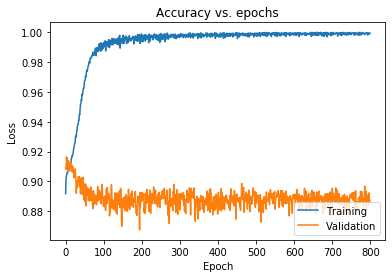

In [68]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

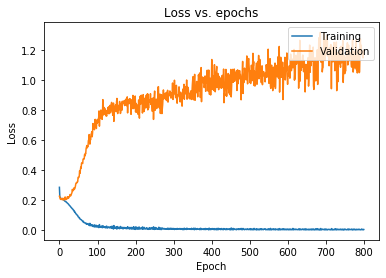

In [69]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

# Using drop out layers to avoid overfitting

In [70]:
from tensorflow.keras import regularizers
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    """
function should return the model.
    """
    
    
    model= Sequential()
    ki=tf.keras.initializers.he_uniform()
    model.add(Dense(64, kernel_initializer=ki, use_bias=True, bias_initializer= tf.keras.initializers.Ones(), input_shape=input_shape))
    model.add(Dense(128, kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(rate=dropout_rate))

    model.add(Dense(64, activation='relu'))    
    model.add(Dense(1,activation='sigmoid'))
    return(model)

In [76]:
reg_model = get_regularised_model(train_data.iloc[0].shape, 0.3, 0.001)

In [78]:
compile_model(reg_model)
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Epoch 1/800
469/469 [==============================] - 1s 2ms/step - loss: 0.5161 - accuracy: 0.8230 - val_loss: 0.3808 - val_accuracy: 0.8881
Epoch 2/800
469/469 [==============================] - 1s 2ms/step - loss: 0.3575 - accuracy: 0.8900 - val_loss: 0.3190 - val_accuracy: 0.9030
Epoch 3/800
469/469 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8923 - val_loss: 0.3062 - val_accuracy: 0.9063
Epoch 4/800
469/469 [==============================] - 1s 2ms/step - loss: 0.3191 - accuracy: 0.8938 - val_loss: 0.2924 - val_accuracy: 0.9120
Epoch 5/800
469/469 [==============================] - 1s 2ms/step - loss: 0.3123 - accuracy: 0.8973 - val_loss: 0.2914 - val_accuracy: 0.9148
Epoch 6/800
469/469 [==============================] - 1s 2ms/step - loss: 0.3067 - accuracy: 0.8969 - val_loss: 0.2890 - val_accuracy: 0.9129
Epoch 7/800
469/469 [==============================] - 1s 2ms/step - loss: 0.3037 - accuracy: 0.8995 - val_loss: 0.2845 - val_accuracy: 0.9126

Epoch 58/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2294 - accuracy: 0.9096 - val_loss: 0.2360 - val_accuracy: 0.9048
Epoch 59/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2287 - accuracy: 0.9096 - val_loss: 0.2349 - val_accuracy: 0.9132
Epoch 60/800
469/469 [==============================] - 2s 4ms/step - loss: 0.2280 - accuracy: 0.9101 - val_loss: 0.2347 - val_accuracy: 0.9117
Epoch 61/800
469/469 [==============================] - 1s 3ms/step - loss: 0.2283 - accuracy: 0.9088 - val_loss: 0.2330 - val_accuracy: 0.9111
Epoch 62/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2276 - accuracy: 0.9097 - val_loss: 0.2350 - val_accuracy: 0.9090
Epoch 63/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2261 - accuracy: 0.9094 - val_loss: 0.2339 - val_accuracy: 0.9084
Epoch 64/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2246 - accuracy: 0.9107 - val_loss: 0.2352 - val_accuracy:

Epoch 115/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2024 - accuracy: 0.9160 - val_loss: 0.2344 - val_accuracy: 0.9075
Epoch 116/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2011 - accuracy: 0.9164 - val_loss: 0.2337 - val_accuracy: 0.9066
Epoch 117/800
469/469 [==============================] - 1s 2ms/step - loss: 0.2005 - accuracy: 0.9162 - val_loss: 0.2320 - val_accuracy: 0.9096
Epoch 118/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1994 - accuracy: 0.9152 - val_loss: 0.2346 - val_accuracy: 0.9093
Epoch 119/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1980 - accuracy: 0.9158 - val_loss: 0.2319 - val_accuracy: 0.9096
Epoch 120/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1982 - accuracy: 0.9151 - val_loss: 0.2293 - val_accuracy: 0.9126
Epoch 121/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1975 - accuracy: 0.9156 - val_loss: 0.2312 - val_ac

469/469 [==============================] - 1s 1ms/step - loss: 0.1855 - accuracy: 0.9208 - val_loss: 0.2358 - val_accuracy: 0.9033
Epoch 172/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1856 - accuracy: 0.9226 - val_loss: 0.2370 - val_accuracy: 0.9057
Epoch 173/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1863 - accuracy: 0.9209 - val_loss: 0.2378 - val_accuracy: 0.9075
Epoch 174/800
469/469 [==============================] - 1s 1ms/step - loss: 0.1807 - accuracy: 0.9227 - val_loss: 0.2377 - val_accuracy: 0.9039
Epoch 175/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1838 - accuracy: 0.9215 - val_loss: 0.2407 - val_accuracy: 0.9066
Epoch 176/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1839 - accuracy: 0.9242 - val_loss: 0.2381 - val_accuracy: 0.9063
Epoch 177/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1840 - accuracy: 0.9223 - val_loss: 0.2370 - val_accuracy: 0.9072

469/469 [==============================] - 1s 2ms/step - loss: 0.1726 - accuracy: 0.9262 - val_loss: 0.2432 - val_accuracy: 0.9036
Epoch 228/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9280 - val_loss: 0.2463 - val_accuracy: 0.9027
Epoch 229/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9273 - val_loss: 0.2426 - val_accuracy: 0.9042
Epoch 230/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1713 - accuracy: 0.9272 - val_loss: 0.2437 - val_accuracy: 0.9057
Epoch 231/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1731 - accuracy: 0.9261 - val_loss: 0.2468 - val_accuracy: 0.9008
Epoch 232/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1722 - accuracy: 0.9274 - val_loss: 0.2401 - val_accuracy: 0.9030
Epoch 233/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1717 - accuracy: 0.9273 - val_loss: 0.2444 - val_accuracy: 0.9015

469/469 [==============================] - 1s 2ms/step - loss: 0.1675 - accuracy: 0.9292 - val_loss: 0.2463 - val_accuracy: 0.8987
Epoch 284/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1620 - accuracy: 0.9320 - val_loss: 0.2499 - val_accuracy: 0.8939
Epoch 285/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9293 - val_loss: 0.2484 - val_accuracy: 0.8996
Epoch 286/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1636 - accuracy: 0.9306 - val_loss: 0.2504 - val_accuracy: 0.8999
Epoch 287/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9289 - val_loss: 0.2459 - val_accuracy: 0.9021
Epoch 288/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1611 - accuracy: 0.9318 - val_loss: 0.2499 - val_accuracy: 0.8981
Epoch 289/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1621 - accuracy: 0.9322 - val_loss: 0.2530 - val_accuracy: 0.8960

469/469 [==============================] - 1s 2ms/step - loss: 0.1566 - accuracy: 0.9347 - val_loss: 0.2507 - val_accuracy: 0.8990
Epoch 340/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.9350 - val_loss: 0.2504 - val_accuracy: 0.8990
Epoch 341/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1565 - accuracy: 0.9351 - val_loss: 0.2579 - val_accuracy: 0.8960
Epoch 342/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1553 - accuracy: 0.9356 - val_loss: 0.2491 - val_accuracy: 0.8993
Epoch 343/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1581 - accuracy: 0.9340 - val_loss: 0.2528 - val_accuracy: 0.8939
Epoch 344/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1561 - accuracy: 0.9343 - val_loss: 0.2525 - val_accuracy: 0.8948
Epoch 345/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1588 - accuracy: 0.9321 - val_loss: 0.2546 - val_accuracy: 0.9011

469/469 [==============================] - 1s 2ms/step - loss: 0.1529 - accuracy: 0.9362 - val_loss: 0.2599 - val_accuracy: 0.8963
Epoch 396/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9361 - val_loss: 0.2689 - val_accuracy: 0.8933
Epoch 397/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1525 - accuracy: 0.9350 - val_loss: 0.2687 - val_accuracy: 0.8921
Epoch 398/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1545 - accuracy: 0.9335 - val_loss: 0.2629 - val_accuracy: 0.8915
Epoch 399/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1521 - accuracy: 0.9356 - val_loss: 0.2648 - val_accuracy: 0.8930
Epoch 400/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1516 - accuracy: 0.9365 - val_loss: 0.2526 - val_accuracy: 0.8966
Epoch 401/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.9353 - val_loss: 0.2537 - val_accuracy: 0.8966

469/469 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.9385 - val_loss: 0.2585 - val_accuracy: 0.8972
Epoch 452/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1476 - accuracy: 0.9386 - val_loss: 0.2536 - val_accuracy: 0.8951
Epoch 453/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9368 - val_loss: 0.2674 - val_accuracy: 0.8975
Epoch 454/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1458 - accuracy: 0.9377 - val_loss: 0.2767 - val_accuracy: 0.8945
Epoch 455/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1461 - accuracy: 0.9389 - val_loss: 0.2627 - val_accuracy: 0.8945
Epoch 456/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1449 - accuracy: 0.9385 - val_loss: 0.2645 - val_accuracy: 0.8951
Epoch 457/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1460 - accuracy: 0.9393 - val_loss: 0.2629 - val_accuracy: 0.8945

469/469 [==============================] - 1s 2ms/step - loss: 0.1418 - accuracy: 0.9411 - val_loss: 0.2696 - val_accuracy: 0.8936
Epoch 508/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1447 - accuracy: 0.9401 - val_loss: 0.2713 - val_accuracy: 0.8909
Epoch 509/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1442 - accuracy: 0.9396 - val_loss: 0.2719 - val_accuracy: 0.8987
Epoch 510/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1426 - accuracy: 0.9412 - val_loss: 0.2732 - val_accuracy: 0.8936
Epoch 511/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1408 - accuracy: 0.9422 - val_loss: 0.2755 - val_accuracy: 0.8921
Epoch 512/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1429 - accuracy: 0.9400 - val_loss: 0.2778 - val_accuracy: 0.8921
Epoch 513/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9401 - val_loss: 0.2751 - val_accuracy: 0.8933

469/469 [==============================] - 1s 2ms/step - loss: 0.1428 - accuracy: 0.9390 - val_loss: 0.2636 - val_accuracy: 0.8963
Epoch 564/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9416 - val_loss: 0.2751 - val_accuracy: 0.8906
Epoch 565/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1382 - accuracy: 0.9413 - val_loss: 0.2817 - val_accuracy: 0.8984
Epoch 566/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1392 - accuracy: 0.9426 - val_loss: 0.2712 - val_accuracy: 0.8981
Epoch 567/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1409 - accuracy: 0.9408 - val_loss: 0.2755 - val_accuracy: 0.8948
Epoch 568/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1401 - accuracy: 0.9396 - val_loss: 0.2766 - val_accuracy: 0.8972
Epoch 569/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1400 - accuracy: 0.9415 - val_loss: 0.2772 - val_accuracy: 0.8954

469/469 [==============================] - 1s 2ms/step - loss: 0.1341 - accuracy: 0.9445 - val_loss: 0.2787 - val_accuracy: 0.8978
Epoch 620/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1348 - accuracy: 0.9441 - val_loss: 0.2862 - val_accuracy: 0.8939
Epoch 621/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1384 - accuracy: 0.9436 - val_loss: 0.2744 - val_accuracy: 0.8966
Epoch 622/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9444 - val_loss: 0.2854 - val_accuracy: 0.8939
Epoch 623/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1388 - accuracy: 0.9430 - val_loss: 0.2811 - val_accuracy: 0.9008
Epoch 624/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1350 - accuracy: 0.9440 - val_loss: 0.2780 - val_accuracy: 0.8981
Epoch 625/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1373 - accuracy: 0.9422 - val_loss: 0.2768 - val_accuracy: 0.8969

469/469 [==============================] - 1s 2ms/step - loss: 0.1351 - accuracy: 0.9448 - val_loss: 0.2900 - val_accuracy: 0.8936
Epoch 676/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1348 - accuracy: 0.9451 - val_loss: 0.2809 - val_accuracy: 0.8960
Epoch 677/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1349 - accuracy: 0.9453 - val_loss: 0.2802 - val_accuracy: 0.8960
Epoch 678/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1335 - accuracy: 0.9455 - val_loss: 0.2923 - val_accuracy: 0.8915
Epoch 679/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1342 - accuracy: 0.9435 - val_loss: 0.2881 - val_accuracy: 0.8903
Epoch 680/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1360 - accuracy: 0.9423 - val_loss: 0.2892 - val_accuracy: 0.8990
Epoch 681/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9445 - val_loss: 0.2888 - val_accuracy: 0.8951

469/469 [==============================] - 1s 2ms/step - loss: 0.1339 - accuracy: 0.9451 - val_loss: 0.2891 - val_accuracy: 0.8915
Epoch 732/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1330 - accuracy: 0.9453 - val_loss: 0.2916 - val_accuracy: 0.8942
Epoch 733/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9459 - val_loss: 0.2843 - val_accuracy: 0.8939
Epoch 734/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1331 - accuracy: 0.9456 - val_loss: 0.2907 - val_accuracy: 0.8945
Epoch 735/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1338 - accuracy: 0.9456 - val_loss: 0.2888 - val_accuracy: 0.8921
Epoch 736/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9441 - val_loss: 0.2881 - val_accuracy: 0.8969
Epoch 737/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1351 - accuracy: 0.9451 - val_loss: 0.2856 - val_accuracy: 0.8930

469/469 [==============================] - 1s 2ms/step - loss: 0.1308 - accuracy: 0.9457 - val_loss: 0.2896 - val_accuracy: 0.8972
Epoch 788/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1306 - accuracy: 0.9453 - val_loss: 0.2906 - val_accuracy: 0.8972
Epoch 789/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9461 - val_loss: 0.2905 - val_accuracy: 0.8963
Epoch 790/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9458 - val_loss: 0.2953 - val_accuracy: 0.8894
Epoch 791/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9449 - val_loss: 0.2887 - val_accuracy: 0.8942
Epoch 792/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1323 - accuracy: 0.9446 - val_loss: 0.2841 - val_accuracy: 0.8957
Epoch 793/800
469/469 [==============================] - 1s 2ms/step - loss: 0.1306 - accuracy: 0.9471 - val_loss: 0.2926 - val_accuracy: 0.8924

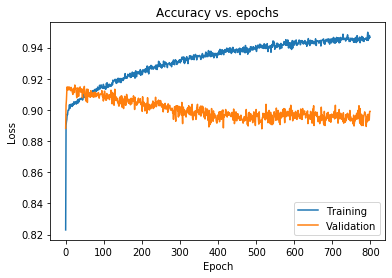

In [79]:

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

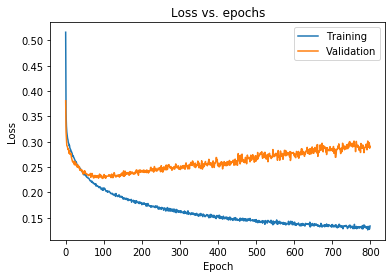

In [80]:
plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [82]:
## testing on validation data
model.evaluate(test_data, test_targets)

340/340 [==============================] - 0s 556us/step - loss: 1.1814 - accuracy: 0.8877


[1.181388020515442, 0.8876714706420898]

# Building a simpler NN model

In [86]:
## setting model architecture
def get_simple_model(input_shape):
    """
function should return the model.
    """
    model= Sequential()
    ki=tf.keras.initializers.he_uniform()
    model.add(Dense(27, kernel_initializer=ki, use_bias=True, bias_initializer= tf.keras.initializers.Ones(), input_shape=input_shape))
    model.add(Dense(1,activation='sigmoid'))
    
    return(model)

In [89]:
def compile_simple_model(model):
    """

    """
    opt = Adam(lr=0.0001)
    
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [90]:
sim_model=get_simple_model(train_data.iloc[0].shape)
compile_simple_model(sim_model)
sim_history = train_model(sim_model, train_data, train_targets, epochs=800)

Epoch 1/800
469/469 [==============================] - 1s 1ms/step - loss: 0.6810 - accuracy: 0.6196 - val_loss: 0.3581 - val_accuracy: 0.8869
Epoch 2/800
469/469 [==============================] - 0s 810us/step - loss: 0.3100 - accuracy: 0.8914 - val_loss: 0.2781 - val_accuracy: 0.8939
Epoch 3/800
469/469 [==============================] - 0s 731us/step - loss: 0.2721 - accuracy: 0.8939 - val_loss: 0.2570 - val_accuracy: 0.8957
Epoch 4/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.8954 - val_loss: 0.2455 - val_accuracy: 0.8990
Epoch 5/800
469/469 [==============================] - 0s 817us/step - loss: 0.2502 - accuracy: 0.8979 - val_loss: 0.2381 - val_accuracy: 0.9027
Epoch 6/800
469/469 [==============================] - 0s 702us/step - loss: 0.2453 - accuracy: 0.8998 - val_loss: 0.2331 - val_accuracy: 0.9045
Epoch 7/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2419 - accuracy: 0.9011 - val_loss: 0.2297 - val_accuracy

469/469 [==============================] - 0s 624us/step - loss: 0.2333 - accuracy: 0.9057 - val_loss: 0.2199 - val_accuracy: 0.9117
Epoch 58/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9120
Epoch 59/800
469/469 [==============================] - 0s 743us/step - loss: 0.2333 - accuracy: 0.9055 - val_loss: 0.2196 - val_accuracy: 0.9120
Epoch 60/800
469/469 [==============================] - 0s 946us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2202 - val_accuracy: 0.9111
Epoch 61/800
469/469 [==============================] - 0s 901us/step - loss: 0.2333 - accuracy: 0.9060 - val_loss: 0.2197 - val_accuracy: 0.9120
Epoch 62/800
469/469 [==============================] - 0s 767us/step - loss: 0.2333 - accuracy: 0.9060 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 63/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9056 - val_loss: 0.2196 - val_accuracy: 0.

469/469 [==============================] - 0s 745us/step - loss: 0.2333 - accuracy: 0.9057 - val_loss: 0.2197 - val_accuracy: 0.9129
Epoch 114/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2333 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9114
Epoch 115/800
469/469 [==============================] - 0s 786us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2196 - val_accuracy: 0.9129
Epoch 116/800
469/469 [==============================] - 0s 698us/step - loss: 0.2333 - accuracy: 0.9058 - val_loss: 0.2197 - val_accuracy: 0.9117
Epoch 117/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2199 - val_accuracy: 0.9114
Epoch 118/800
469/469 [==============================] - 0s 809us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2197 - val_accuracy: 0.9129
Epoch 119/800
469/469 [==============================] - 0s 643us/step - loss: 0.2332 - accuracy: 0.9061 - val_loss: 0.2199 - val_accura

469/469 [==============================] - 0s 855us/step - loss: 0.2333 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 170/800
469/469 [==============================] - 0s 695us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 171/800
469/469 [==============================] - 0s 997us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 172/800
469/469 [==============================] - 0s 775us/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 173/800
469/469 [==============================] - 0s 674us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9120
Epoch 174/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 175/800
469/469 [==============================] - 0s 787us/step - loss: 0.2333 - accuracy: 0.9057 - val_loss: 0.2196 - val_accu

469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2197 - val_accuracy: 0.9117
Epoch 226/800
469/469 [==============================] - 0s 806us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2198 - val_accuracy: 0.9111
Epoch 227/800
469/469 [==============================] - 0s 656us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2197 - val_accuracy: 0.9129
Epoch 228/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2198 - val_accuracy: 0.9123
Epoch 229/800
469/469 [==============================] - 0s 795us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 230/800
469/469 [==============================] - 0s 624us/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.2198 - val_accuracy: 0.9120
Epoch 231/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2195 - val_accuracy

469/469 [==============================] - 0s 766us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2198 - val_accuracy: 0.9117
Epoch 282/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9120
Epoch 283/800
469/469 [==============================] - 0s 881us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 284/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 285/800
469/469 [==============================] - 0s 925us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 286/800
469/469 [==============================] - 0s 799us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 287/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2196 - val_accuracy

469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 338/800
469/469 [==============================] - 0s 900us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2201 - val_accuracy: 0.9108
Epoch 339/800
469/469 [==============================] - 0s 796us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2198 - val_accuracy: 0.9117
Epoch 340/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2198 - val_accuracy: 0.9123
Epoch 341/800
469/469 [==============================] - 0s 835us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 342/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2200 - val_accuracy: 0.9111
Epoch 343/800
469/469 [==============================] - 0s 933us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2198 - val_accuracy

469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9062 - val_loss: 0.2199 - val_accuracy: 0.9111
Epoch 394/800
469/469 [==============================] - 0s 819us/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 395/800
469/469 [==============================] - 0s 687us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2198 - val_accuracy: 0.9114
Epoch 396/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 397/800
469/469 [==============================] - 0s 843us/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2198 - val_accuracy: 0.9126
Epoch 398/800
469/469 [==============================] - 0s 700us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 399/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.2196 - val_accuracy

469/469 [==============================] - 1s 1ms/step - loss: 0.2333 - accuracy: 0.9058 - val_loss: 0.2198 - val_accuracy: 0.9120
Epoch 450/800
469/469 [==============================] - 0s 994us/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.2199 - val_accuracy: 0.9117
Epoch 451/800
469/469 [==============================] - 0s 790us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 452/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2196 - val_accuracy: 0.9123
Epoch 453/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9056 - val_loss: 0.2198 - val_accuracy: 0.9114
Epoch 454/800
469/469 [==============================] - 0s 831us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2198 - val_accuracy: 0.9120
Epoch 455/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2197 - val_accuracy: 

469/469 [==============================] - 0s 944us/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9129
Epoch 506/800
469/469 [==============================] - 0s 778us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2200 - val_accuracy: 0.9114
Epoch 507/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2198 - val_accuracy: 0.9120
Epoch 508/800
469/469 [==============================] - 0s 917us/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2198 - val_accuracy: 0.9120
Epoch 509/800
469/469 [==============================] - 0s 757us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2196 - val_accuracy: 0.9126
Epoch 510/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 511/800
469/469 [==============================] - 0s 883us/step - loss: 0.2331 - accuracy: 0.9054 - val_loss: 0.2195 - val_accura

469/469 [==============================] - 0s 846us/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2195 - val_accuracy: 0.9135
Epoch 562/800
469/469 [==============================] - 0s 710us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2199 - val_accuracy: 0.9114
Epoch 563/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2331 - accuracy: 0.9057 - val_loss: 0.2202 - val_accuracy: 0.9108
Epoch 564/800
469/469 [==============================] - 0s 816us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2195 - val_accuracy: 0.9132
Epoch 565/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 566/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 567/800
469/469 [==============================] - 0s 759us/step - loss: 0.2332 - accuracy: 0.9054 - val_loss: 0.2197 - val_accuracy

469/469 [==============================] - 0s 737us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 618/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2197 - val_accuracy: 0.9126
Epoch 619/800
469/469 [==============================] - 0s 828us/step - loss: 0.2331 - accuracy: 0.9057 - val_loss: 0.2196 - val_accuracy: 0.9126
Epoch 620/800
469/469 [==============================] - 0s 776us/step - loss: 0.2331 - accuracy: 0.9057 - val_loss: 0.2200 - val_accuracy: 0.9111
Epoch 621/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2195 - val_accuracy: 0.9135
Epoch 622/800
469/469 [==============================] - 0s 802us/step - loss: 0.2333 - accuracy: 0.9058 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 623/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2196 - val_accuracy

469/469 [==============================] - 0s 717us/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2196 - val_accuracy: 0.9129
Epoch 674/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2195 - val_accuracy: 0.9138
Epoch 675/800
469/469 [==============================] - 0s 875us/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 676/800
469/469 [==============================] - 0s 712us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2198 - val_accuracy: 0.9114
Epoch 677/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9051 - val_loss: 0.2195 - val_accuracy: 0.9138
Epoch 678/800
469/469 [==============================] - 0s 865us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2197 - val_accuracy: 0.9120
Epoch 679/800
469/469 [==============================] - 0s 710us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2200 - val_accura

469/469 [==============================] - 0s 823us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2196 - val_accuracy: 0.9132
Epoch 730/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 731/800
469/469 [==============================] - 0s 925us/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2199 - val_accuracy: 0.9111
Epoch 732/800
469/469 [==============================] - 0s 759us/step - loss: 0.2332 - accuracy: 0.9057 - val_loss: 0.2196 - val_accuracy: 0.9135
Epoch 733/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9059 - val_loss: 0.2199 - val_accuracy: 0.9114
Epoch 734/800
469/469 [==============================] - 0s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2201 - val_accuracy: 0.9108
Epoch 735/800
469/469 [==============================] - 0s 715us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2197 - val_accuracy

469/469 [==============================] - 0s 897us/step - loss: 0.2331 - accuracy: 0.9056 - val_loss: 0.2198 - val_accuracy: 0.9114
Epoch 786/800
469/469 [==============================] - 0s 735us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 787/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9056 - val_loss: 0.2197 - val_accuracy: 0.9129
Epoch 788/800
469/469 [==============================] - 0s 887us/step - loss: 0.2332 - accuracy: 0.9060 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 789/800
469/469 [==============================] - 0s 731us/step - loss: 0.2332 - accuracy: 0.9055 - val_loss: 0.2198 - val_accuracy: 0.9123
Epoch 790/800
469/469 [==============================] - 1s 1ms/step - loss: 0.2332 - accuracy: 0.9058 - val_loss: 0.2197 - val_accuracy: 0.9123
Epoch 791/800
469/469 [==============================] - 0s 851us/step - loss: 0.2332 - accuracy: 0.9053 - val_loss: 0.2197 - val_accura

In [ ]:
df_=sim_history.history

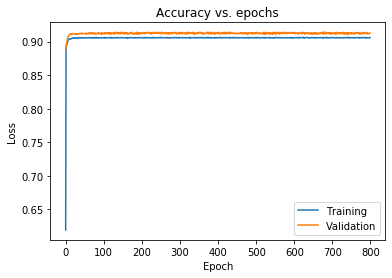

In [91]:
try:
    plt.plot(sim_history.history['accuracy'])
    plt.plot(sim_history.history['val_accuracy'])
except KeyError:
    plt.plot(sim_history.history['acc'])
    plt.plot(sim_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

In [92]:
sim_model.evaluate(test_data, test_targets)

340/340 [==============================] - 0s 427us/step - loss: 0.2316 - accuracy: 0.9050


[0.23156748712062836, 0.9049811363220215]

In [93]:
sim_model.evaluate(train_data, train_targets)

690/690 [==============================] - 0s 661us/step - loss: 0.2309 - accuracy: 0.9068


[0.23091499507427216, 0.9068438410758972]

In [ ]:
## incresed epocs, add 1 more hidden layer, early stopping

In [100]:
## setting model architecture
def get_simple_model2(input_shape):

    model= Sequential()
    ki=tf.keras.initializers.he_uniform()
    model.add(Dense(27, kernel_initializer=ki, use_bias=True, bias_initializer= tf.keras.initializers.Ones(), input_shape=input_shape))
    model.add(Dense(27,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    return(model)

def compile_simple_model(model):
    """

    """
    opt = Adam(lr=0.0001)
    
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

    
sim_model2=get_simple_model2(train_data.iloc[0].shape)
compile_simple_model(sim_model2)
sim_history_2 = sim_model2.fit(train_data, train_targets, epochs=1500,verbose=True, batch_size=40, validation_split=0.15
                            ,callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])    


Epoch 1/1500
469/469 [==============================] - 0s 985us/step - loss: 0.6229 - accuracy: 0.6660 - val_loss: 0.3088 - val_accuracy: 0.8906
Epoch 2/1500
469/469 [==============================] - 1s 1ms/step - loss: 0.2929 - accuracy: 0.8908 - val_loss: 0.2725 - val_accuracy: 0.8933
Epoch 3/1500
469/469 [==============================] - 0s 908us/step - loss: 0.2673 - accuracy: 0.8940 - val_loss: 0.2520 - val_accuracy: 0.8972
Epoch 4/1500
469/469 [==============================] - 0s 764us/step - loss: 0.2515 - accuracy: 0.8964 - val_loss: 0.2391 - val_accuracy: 0.9024
Epoch 5/1500
469/469 [==============================] - 1s 2ms/step - loss: 0.2413 - accuracy: 0.8997 - val_loss: 0.2304 - val_accuracy: 0.9060
Epoch 6/1500
469/469 [==============================] - 0s 991us/step - loss: 0.2344 - accuracy: 0.9020 - val_loss: 0.2250 - val_accuracy: 0.9072
Epoch 7/1500
469/469 [==============================] - 1s 1ms/step - loss: 0.2293 - accuracy: 0.9026 - val_loss: 0.2205 - val_a

In [101]:
sim_model2.evaluate(test_data, test_targets)

340/340 [==============================] - 0s 430us/step - loss: 0.2090 - accuracy: 0.9063


[0.2089727371931076, 0.9062701463699341]

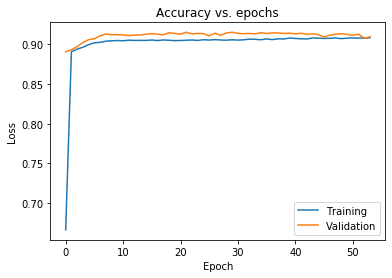

In [103]:
try:
    plt.plot(sim_history_2.history['accuracy'])
    plt.plot(sim_history_2.history['val_accuracy'])
except KeyError:
    plt.plot(sim_history_2.history['acc'])
    plt.plot(sim_history_2.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

## after having some idea on network architecuire, tuning the model


In [3]:
! pip install -q -U keras-tuner
import keras_tuner as kt

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [17]:
def model_builder(hp):
    
    model = Sequential()

    # Tune the number of units in the first Dense layer
    # Choose an optimal value between 32-512
    hp_units1 = hp.Int('units1', min_value=2, max_value=102, step=20)
    model.add(Dense(units=hp_units1, activation='relu'))
    model.add(BatchNormalization())
    hp_units2 = hp.Int('units2', min_value=2, max_value=102, step=20)
    model.add(Dense(units=hp_units2, activation='relu'))
    
    hp_dropout_rate = hp.Choice('dropout_rate', values=[.3,.5])
    model.add(Dropout(rate=hp_dropout_rate))
    
    hp_units3 = hp.Int('units3', min_value=1, max_value=101, step=20)
    model.add(Dense(units=hp_units3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    opt = Adam(lr=hp_learning_rate)
    model.compile(optimizer=opt,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    return model

In [18]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='classification call')

INFO:tensorflow:Reloading Oracle from existing project my_dir/classification call/oracle.json
INFO:tensorflow:Reloading Tuner from my_dir/classification call/tuner0.json


In [19]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [20]:
tuner.search(train_data, train_targets, epochs=50, validation_split=0.2, callbacks=[stop_early])

INFO:tensorflow:Oracle triggered exit


In [21]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [139]:
best_hps.values

{'units': 82,
 'dropout_rate': 0.3,
 'learning_rate': 0.001,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 2,
 'tuner/round': 0}

In [132]:
best_hps.get_config()

{'space': [{'class_name': 'Int',
   'config': {'name': 'units',
    'default': None,
    'conditions': [],
    'min_value': 2,
    'max_value': 102,
    'step': 20,
    'sampling': None}},
  {'class_name': 'Choice',
   'config': {'name': 'dropout_rate',
    'default': 0.3,
    'conditions': [],
    'values': [0.3, 0.5],
    'ordered': True}},
  {'class_name': 'Choice',
   'config': {'name': 'learning_rate',
    'default': 0.01,
    'conditions': [],
    'values': [0.01, 0.001, 0.0001],
    'ordered': True}}],
 'values': {'units': 82,
  'dropout_rate': 0.3,
  'learning_rate': 0.001,
  'tuner/epochs': 2,
  'tuner/initial_epoch': 0,
  'tuner/bracket': 2,
  'tuner/round': 0}}